In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
from scipy import signal
import pandas as pd
import statsmodels.stats.diagnostic as sm
import math
import obspy
from obspy.signal.detrend import polynomial
from statsmodels.tsa import stattools
import pywt 

In [58]:
dados = sc.loadmat('SST.mat')
sst = dados['sst']
plt.style.use('ggplot')


In [81]:
ssti = sst[0,0:2000]
time= np.linspace(start=0,stop=len(ssti),num=len(ssti) )
ssti = pd.Series(ssti).interpolate().values
sstbaixa = signal.savgol_filter(ssti,73,2)
bfs, bPs = signal.welch(sstbaixa)

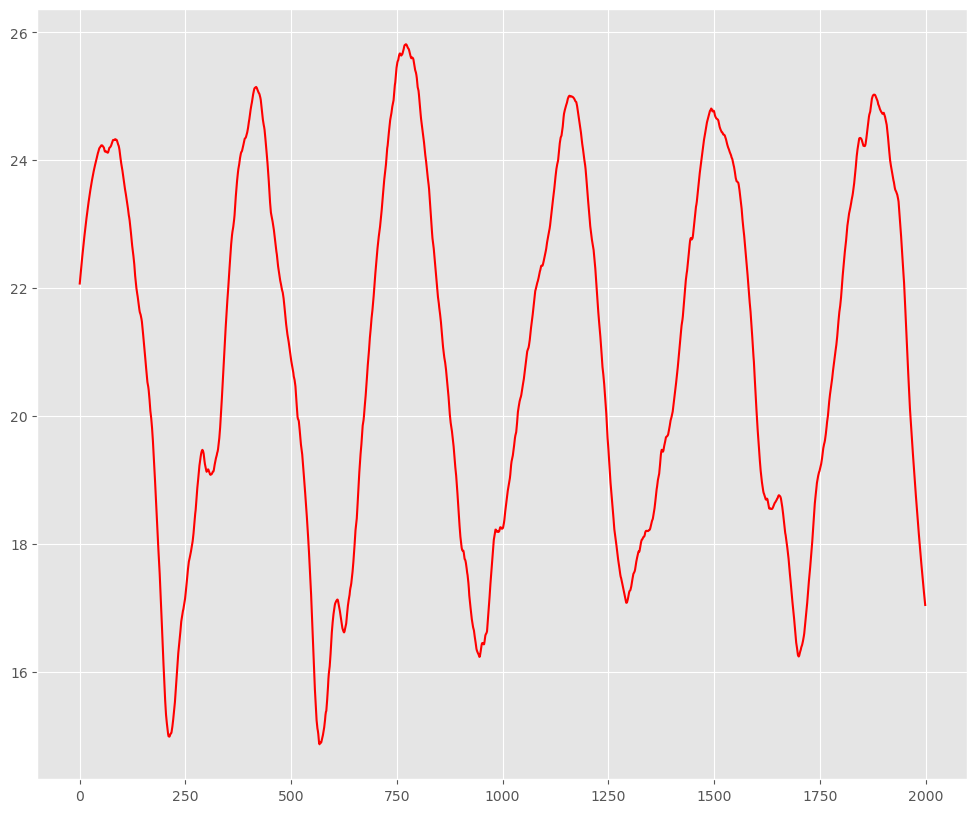

In [82]:
plt.figure(figsize=(12,10))
a1=plt.plot(sstbaixa,'r',label='SST interpolada')

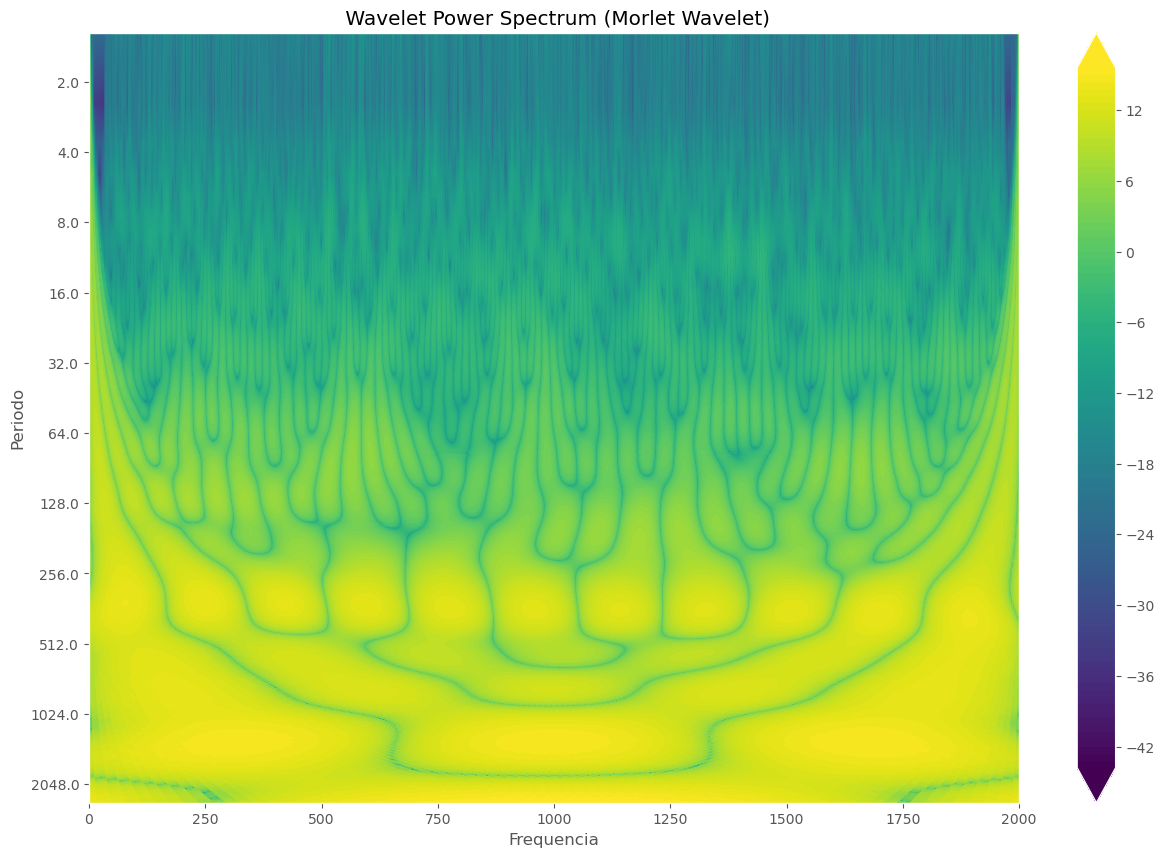

In [111]:
cA, freq = pywt.cwt(sstbaixa,np.arange(1, 2000), 'morl')
power = (abs(cA))**2
period = 1./freq

f, ax = plt.subplots(figsize=(15, 10))
a=ax.contourf(time, np.log2(period), np.log2(power), 100,
            extend='both')

ax.set_title(' Wavelet Power Spectrum (Morlet Wavelet)' )
ax.set_ylabel('Periodo')
ax.set_xlabel('Frequencia')

Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
plt.colorbar(a)

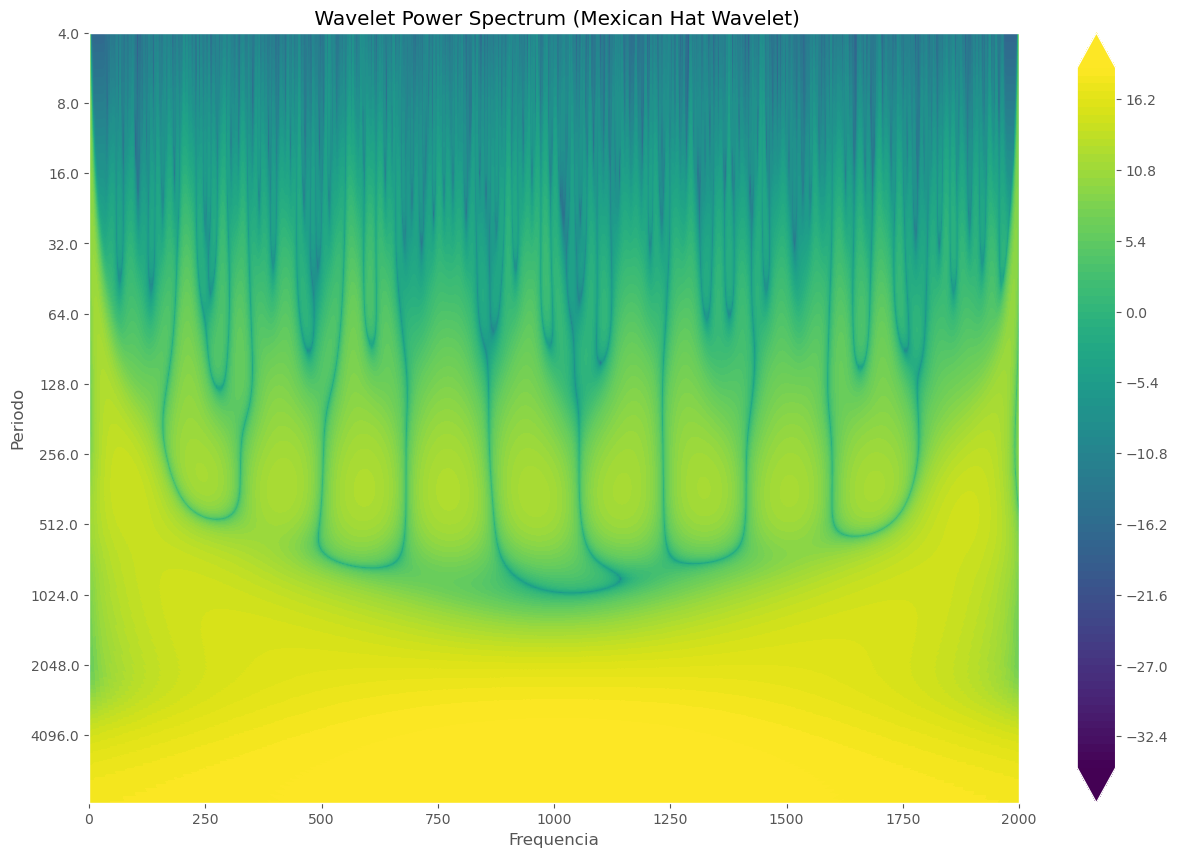

In [92]:
cA, freq = pywt.cwt(sstbaixa,np.arange(1, 2000), 'mexh')
power = (abs(cA))**2
period = 1./freq
f, ax = plt.subplots(figsize=(15, 10))
a=ax.contourf(time, np.log2(period), np.log2(power), 100,
            extend='both')

ax.set_title(' Wavelet Power Spectrum (Mexican Hat Wavelet)' )
ax.set_ylabel('Periodo')
ax.set_xlabel('Frequencia')

Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
plt.colorbar(a)


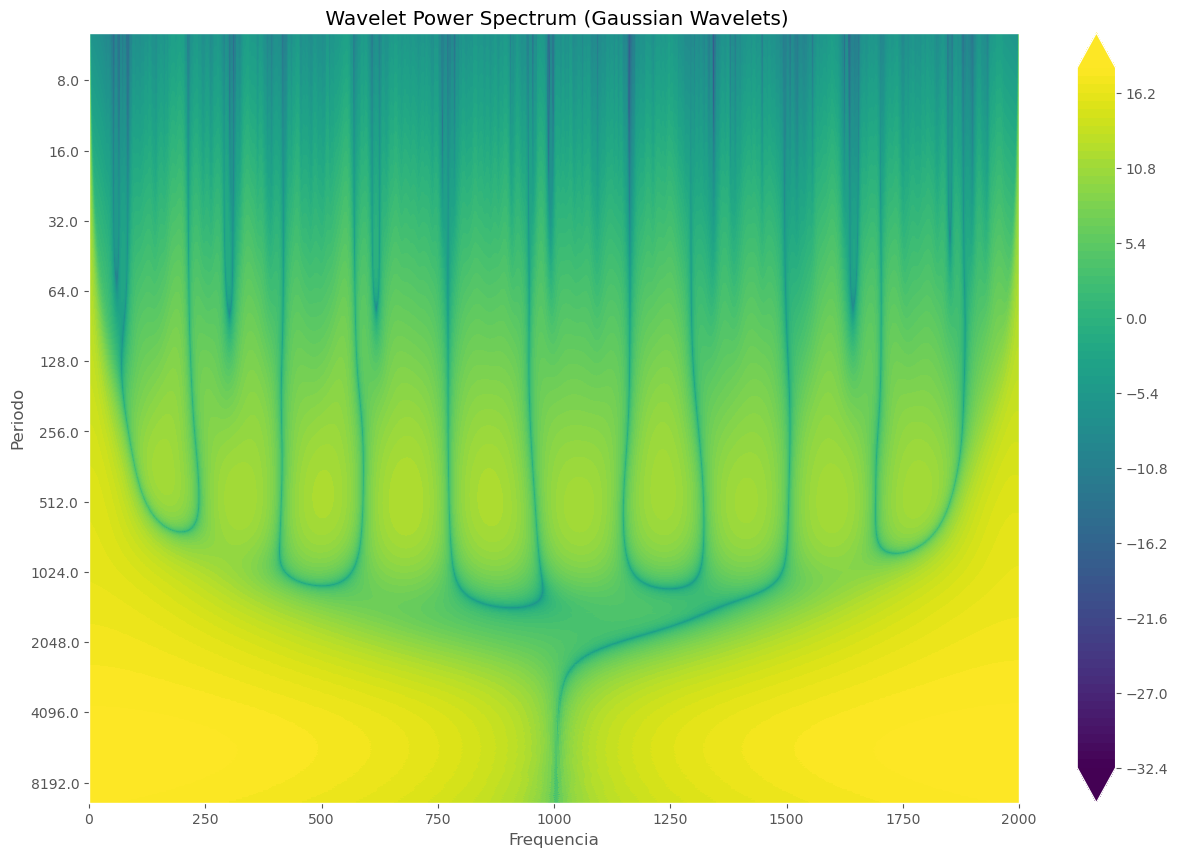

In [103]:
cA, freq = pywt.cwt(sstbaixa,np.arange(1, 2000), 'gaus1')
power = (abs(cA))**2
period = 1./freq
f, ax = plt.subplots(figsize=(15, 10))
a=ax.contourf(time, np.log2(period), np.log2(power), 100,
            extend='both')

ax.set_title(' Wavelet Power Spectrum (Gaussian Wavelets)' )
ax.set_ylabel('Periodo')
ax.set_xlabel('Frequencia')

Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
plt.colorbar(a)
